In [2]:
# SINAN - Modelo de Análise Epidemiológica para DENGUE
# 1. Instalar PySUS (executar isoladamente antes de tudo!)
!pip install git+https://github.com/AlertaDengue/PySUS.git --upgrade


  Cloning https://github.com/AlertaDengue/PySUS.git to /tmp/pip-req-build-p4967ewf
  Running command git clone --filter=blob:none --quiet https://github.com/AlertaDengue/PySUS.git /tmp/pip-req-build-p4967ewf
  Resolved https://github.com/AlertaDengue/PySUS.git to commit 54f7800db4da5171d55e3446d638d64beeb8b149
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.3/57.3 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.6/462.6 k

DENGBR20.parquet: 100%|██████████| 2.40M/2.40M [03:56<00:00, 10.1kB/s]


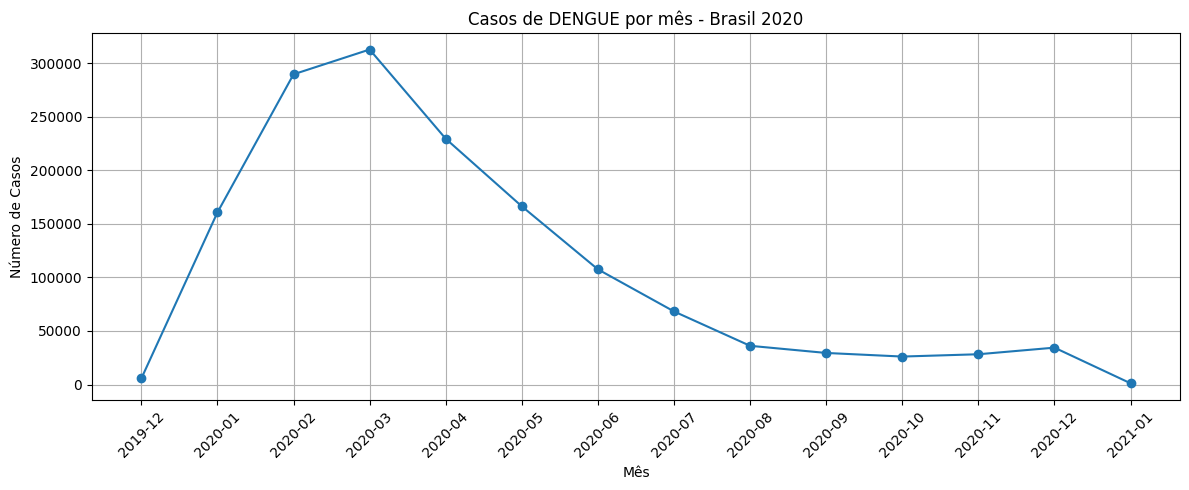

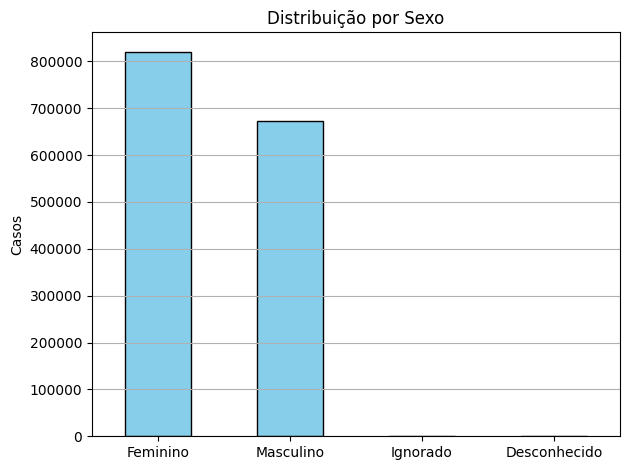

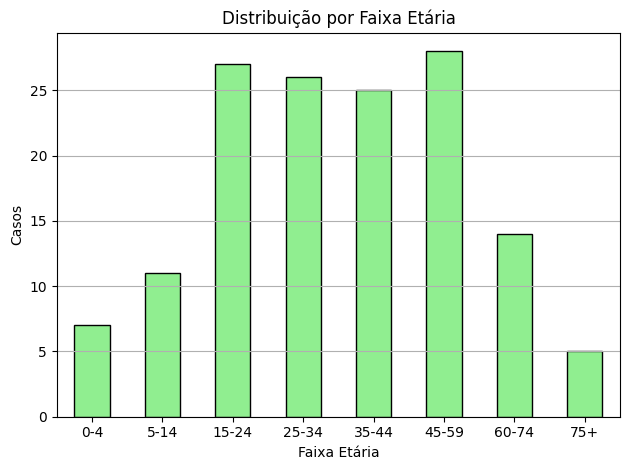

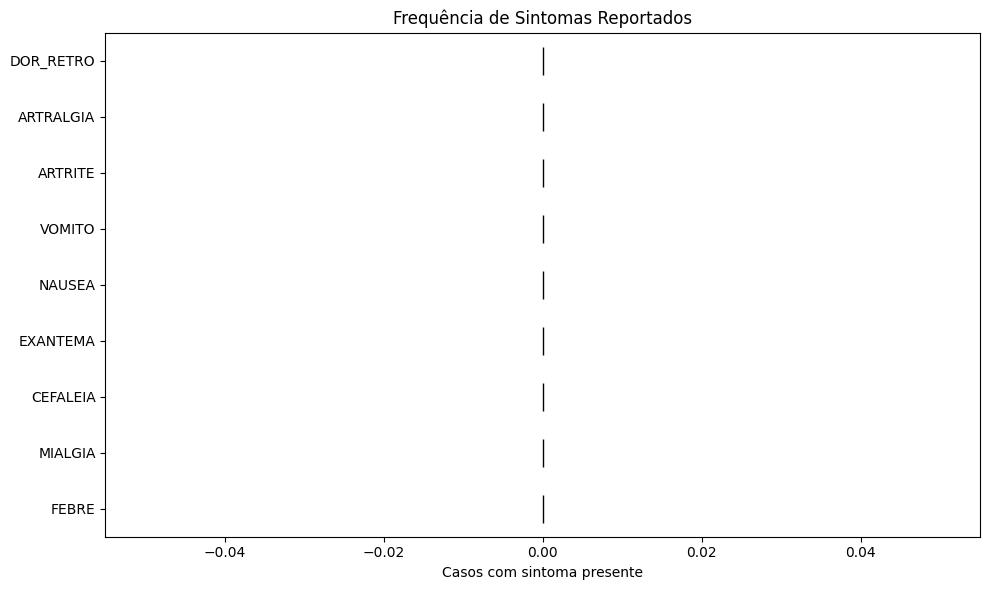

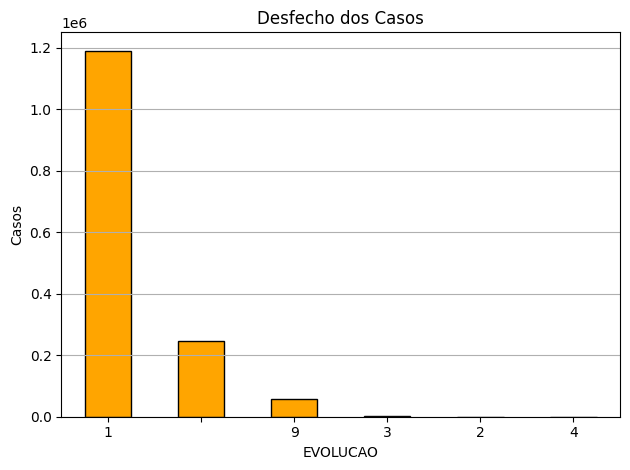

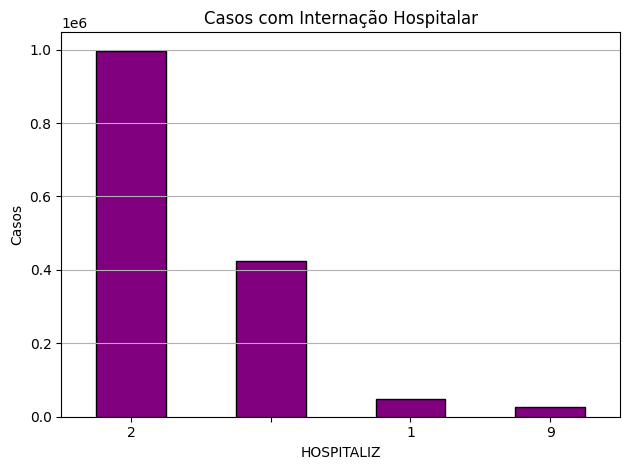

In [1]:
# 2. Importações iniciais
import pandas as pd
import matplotlib.pyplot as plt
from pysus.online_data.SINAN import download

# 3. Download e conversão dos dados
dados = download("DENG", 2020)
df = dados.to_dataframe()

# 4. Preparação e conversões de variáveis

# Datas importantes
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'], errors='coerce')
df['DT_SIN_PRI'] = pd.to_datetime(df['DT_SIN_PRI'], errors='coerce')
df['DT_OBITO'] = pd.to_datetime(df['DT_OBITO'], errors='coerce')

# Idade em faixas
df['NU_IDADE_N'] = pd.to_numeric(df['NU_IDADE_N'], errors='coerce')
df['faixa_etaria'] = pd.cut(df['NU_IDADE_N'],
    bins=[0, 5, 14, 24, 34, 44, 59, 74, 120],
    labels=['0-4', '5-14', '15-24', '25-34', '35-44', '45-59', '60-74', '75+'])

# 5. Evolução temporal dos casos
casos_mensais = df['DT_NOTIFIC'].dt.to_period('M').value_counts().sort_index()
casos_mensais = casos_mensais.rename_axis('Mes').reset_index(name='Casos')

plt.figure(figsize=(12,5))
plt.plot(casos_mensais['Mes'].astype(str), casos_mensais['Casos'], marker='o')
plt.title("Casos de DENGUE por mês - Brasil 2020")
plt.xlabel("Mês")
plt.ylabel("Número de Casos")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Distribuição por sexo
sexo_counts = df['CS_SEXO'].value_counts(dropna=False)
sexo_labels = {'M': 'Masculino', 'F': 'Feminino', 'I': 'Ignorado'}
sexo_counts.index = [sexo_labels.get(s, 'Desconhecido') for s in sexo_counts.index]

sexo_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribuição por Sexo")
plt.ylabel("Casos")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 7. Distribuição por faixa etária
faixa_counts = df['faixa_etaria'].value_counts().sort_index()
faixa_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribuição por Faixa Etária")
plt.ylabel("Casos")
plt.xlabel("Faixa Etária")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 8. Frequência de sintomas mais comuns
sintomas = ['FEBRE', 'MIALGIA', 'CEFALEIA', 'EXANTEMA', 'NAUSEA', 'VOMITO', 'ARTRITE', 'ARTRALGIA', 'DOR_RETRO']
sintomas_freq = df[sintomas].apply(lambda col: col.eq(1).sum()).sort_values()

sintomas_freq.plot(kind='barh', figsize=(10,6), color='salmon', edgecolor='black')
plt.title("Frequência de Sintomas Reportados")
plt.xlabel("Casos com sintoma presente")
plt.tight_layout()
plt.show()

# 9. Desfecho dos casos
if 'EVOLUCAO' in df.columns:
    df['EVOLUCAO'].value_counts(dropna=False).plot(kind='bar', color='orange', edgecolor='black')
    plt.title("Desfecho dos Casos")
    plt.ylabel("Casos")
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# 10. Internação hospitalar
if 'HOSPITALIZ' in df.columns:
    df['HOSPITALIZ'].value_counts(dropna=False).plot(kind='bar', color='purple', edgecolor='black')
    plt.title("Casos com Internação Hospitalar")
    plt.ylabel("Casos")
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
